# 2019 Canadian Election tweets
# OSEMN Step 4: Model
# Sentiment analysis of Sentiment 140 dataset
# Hyperparameter tuning of linear models

This notebook describes part of Step 4: Explore of OSEMN methodology. It covers hyperparameter tuing of linear models used for sentiment classification on Sentiment 140 dataset.

## Import dependencies

In [1]:
random_state = 0

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from nltk import NaiveBayesClassifier
from time import time
import os
import sys

sns.set()
pd.options.display.max_colwidth = 200

In [3]:
os.listdir('../..')

['.git', '.gitignore', 'src', 'notebooks', 'methodology', 'README.md', 'data']

In [4]:
sys.path.append('../../src')
from model_utils import plot_validation_curve

In [5]:
data_dir = '../../data/sentiment140/'
os.listdir(data_dir)

['testdata.manual.2009.06.14.csv',
 'training.1600000.processed.noemoticon.csv',
 'sentiment140_train_nodup.csv',
 'sentiment140_train_cleaned.csv']

## Load cleaned Sentiment 140 dataset

In [6]:
t = time()
df = pd.read_csv(data_dir + 'sentiment140_train_nodup.csv')
elapsed = time() - t
print("----- DataFrame loaded"
      "\nin {0:.2f} seconds".format(elapsed) +
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(df.shape[0], df.shape[1]) +
      "\n-- Column names:\n", df.columns)

----- DataFrame loaded
in 4.46 seconds
with 1,309,540 rows
and 8 columns
-- Column names:
 Index(['sentiment', 'ids', 'date', 'query', 'user', 'text', 'hashtags',
       'handles'],
      dtype='object')


In [7]:
mask1 = df['sentiment'] == 4
df.loc[mask1, 'sentiment'] = 1

## Define functions for tokenization / stemming, with examples

In [8]:
def tokenizer(text):
    return text.split()
tokenizer('runners like running and thus they run')

['runners', 'like', 'running', 'and', 'thus', 'they', 'run']

## Subset for grid search: 1/5 of all records

In [9]:
s = df.sample(len(df) // 5, random_state=random_state).copy()
print("{0:,.0f} rows in the subset".format(len(s)))

261,908 rows in the subset


## Select features and target, perform train-test split

In [10]:
s['sentiment'].value_counts()

0    135523
1    126385
Name: sentiment, dtype: int64

In [11]:
X = s['text']
y = s['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state, stratify=y)
print("Performed train-test split.")
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Performed train-test split.
Labels counts in y: [135523 126385]
Labels counts in y_train: [94866 88469]
Labels counts in y_test: [40657 37916]


## Term Frequency-Inverse Document Frequency (TF-IDF)

### Logistic regression (L2 regularization)

#### Classifier parameters

/home/stepan/anaconda3/envs/twitter/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/stepan/anaconda3/envs/twitter/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/stepan/anaconda3/envs/twitter/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/stepan/anaconda3/envs/twitter/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/stepan/anaconda3/envs/twitter/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: Conver

Validation curve for Logistic Regression (L2, TF-IDF) plotted, took 552.90 seconds (9.22 minutes)


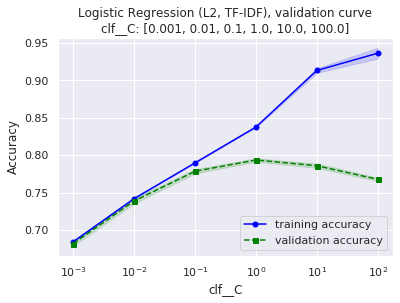

In [12]:
vect_name = 'TF-IDF'
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lr_tfidf = Pipeline([('vect', tfidf), 
                     ('clf', LogisticRegression(random_state=random_state, 
                                                solver='lbfgs',
                                                penalty='l2'))])
param_name = 'clf__C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
model_name = "Logistic Regression (L2, {0})".format(vect_name)
plot_validation_curve(lr_tfidf, model_name, X_train, y_train, param_name, param_range, xlog=True)

/home/stepan/anaconda3/envs/twitter/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/stepan/anaconda3/envs/twitter/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/stepan/anaconda3/envs/twitter/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/stepan/anaconda3/envs/twitter/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/stepan/anaconda3/envs/twitter/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: Conver

Validation curve for Logistic Regression (L2, C=1.0, TF-IDF) plotted, took 362.01 seconds (6.03 minutes)


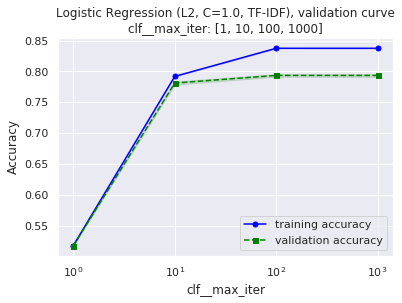

In [13]:
vect_name = 'TF-IDF'
c = 1.0
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lr_tfidf = Pipeline([('vect', tfidf), 
                     ('clf', LogisticRegression(random_state=random_state, 
                                                solver='lbfgs',
                                                penalty='l2',
                                                C=c))])
param_name = 'clf__max_iter'
param_range = [1, 10, 100, 1000]
model_name = "Logistic Regression (L2, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lr_tfidf, model_name, X_train, y_train, param_name, param_range, xlog=True)

#### Vectorization parameters

/home/stepan/anaconda3/envs/twitter/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/stepan/anaconda3/envs/twitter/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/stepan/anaconda3/envs/twitter/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/stepan/anaconda3/envs/twitter/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/stepan/anaconda3/envs/twitter/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: Conver

Validation curve for Logistic Regression (L2, C=1.0, TF-IDF) plotted, took 320.79 seconds (5.35 minutes)


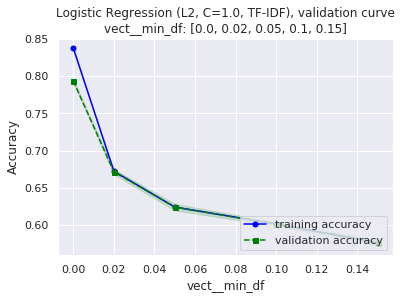

In [14]:
vect_name = 'TF-IDF'
c = 1.0
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lr_tfidf = Pipeline([('vect', tfidf), 
                     ('clf', LogisticRegression(random_state=random_state, 
                                                solver='lbfgs',
                                                penalty='l2',
                                                C=c))])
param_name = 'vect__min_df'
param_range = [0.0, 0.02, 0.05, 0.1, 0.15]
model_name = "Logistic Regression (L2, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lr_tfidf, model_name, X_train, y_train, param_name, param_range)

Validation curve for Logistic Regression (L2, C=1.0, TF-IDF) plotted, took 67.57 seconds (1.13 minutes)


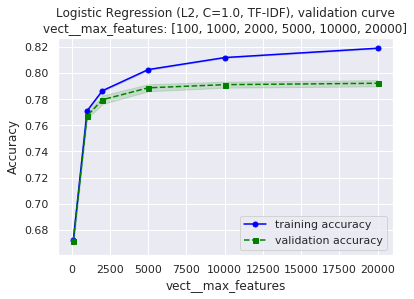

In [91]:
vect_name = 'TF-IDF'
c = 1.0
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lr_tfidf = Pipeline([('vect', tfidf), 
                     ('clf', LogisticRegression(random_state=random_state, 
                                                solver='lbfgs',
                                                penalty='l2',
                                                C=c))])
param_name = 'vect__max_features'
param_range = [100, 1000, 2000, 5000, 10000, 20000]
model_name = "Logistic Regression (L2, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lr_tfidf, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

### Logistic regression (L1 regularization)

#### Classifier parameters

Validation curve for Logistic Regression (L1, TF-IDF) plotted, took 77.26 seconds (1.29 minutes)


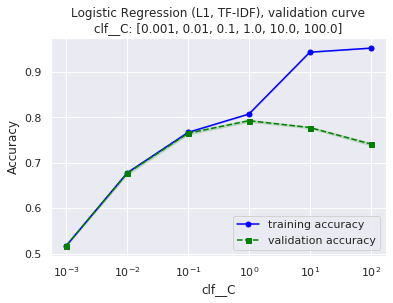

In [19]:
vect_name = 'TF-IDF'
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lr_tfidf = Pipeline([('vect', tfidf), 
                     ('clf', LogisticRegression(random_state=random_state, 
                                                solver='liblinear',
                                                penalty='l1'))])
param_name = 'clf__C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
model_name = "Logistic Regression (L1, {0})".format(vect_name)
plot_validation_curve(lr_tfidf, model_name, X_train, y_train, param_name, param_range, xlog=True, n_jobs=12)

Validation curve for Logistic Regression (L1, C=1.0, TF-IDF) plotted, took 38.41 seconds (0.64 minutes)


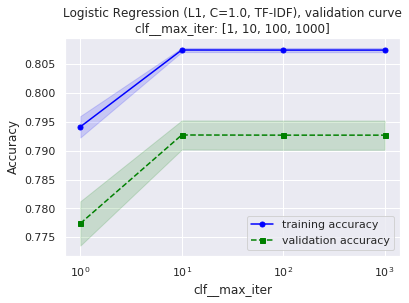

In [20]:
vect_name = 'TF-IDF'
c = 1.0
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lr_tfidf = Pipeline([('vect', tfidf), 
                     ('clf', LogisticRegression(random_state=random_state, 
                                                solver='liblinear',
                                                penalty='l1',
                                                C=c))])
param_name = 'clf__max_iter'
param_range = [1, 10, 100, 1000]
model_name = "Logistic Regression (L1, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lr_tfidf, model_name, X_train, y_train, param_name, param_range, xlog=True, n_jobs=12)

#### Vectorization parameters

Validation curve for Logistic Regression (L1, C=1.0, TF-IDF) plotted, took 39.71 seconds (0.66 minutes)


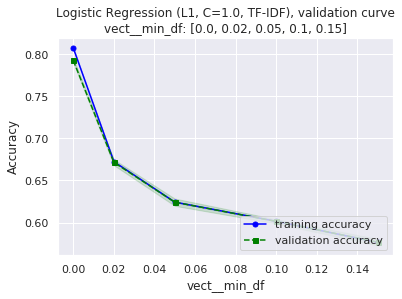

In [21]:
vect_name = 'TF-IDF'
c = 1.0
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lr_tfidf = Pipeline([('vect', tfidf), 
                     ('clf', LogisticRegression(random_state=random_state, 
                                                solver='liblinear',
                                                penalty='l1',
                                                C=c))])
param_name = 'vect__min_df'
param_range = [0.0, 0.02, 0.05, 0.1, 0.15]
model_name = "Logistic Regression (L1, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lr_tfidf, model_name, X_train, y_train, param_name, param_range, n_jobs=12)

/home/stepan/anaconda3/envs/twitter/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Validation curve for Logistic Regression (L1, C=1.0, TF-IDF) plotted, took 61.37 seconds (1.02 minutes)


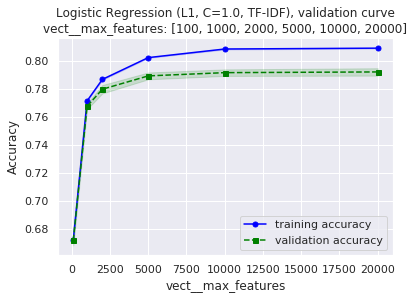

In [92]:
vect_name = 'TF-IDF'
c = 1.0
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lr_tfidf = Pipeline([('vect', tfidf), 
                     ('clf', LogisticRegression(random_state=random_state, 
                                                solver='liblinear',
                                                penalty='l1',
                                                C=c))])
param_name = 'vect__max_features'
param_range = [100, 1000, 2000, 5000, 10000, 20000]
model_name = "Logistic Regression (L1, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lr_tfidf, model_name, X_train, y_train, param_name, param_range, n_jobs=12)

### Linear Support Vector Classification (L2 regularization)

#### Classifier parameters

Validation curve for Linear Support Vector Classifier (L2, TF-IDF) plotted, took 171.51 seconds (2.86 minutes)


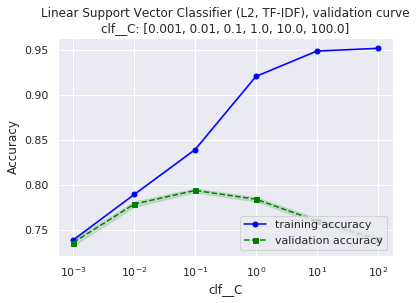

In [26]:
vect_name = 'TF-IDF'
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lsvc_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', LinearSVC(random_state=random_state,
                                         penalty='l2'))])
param_name = 'clf__C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
model_name = "Linear Support Vector Classifier (L2, {0})".format(vect_name)
plot_validation_curve(lsvc_tfidf, model_name, X_train, y_train, param_name, param_range, xlog=True, n_jobs=8)

Validation curve for Linear Support Vector Classifier (L2, C=0.1, TF-IDF) plotted, took 34.29 seconds (0.57 minutes)


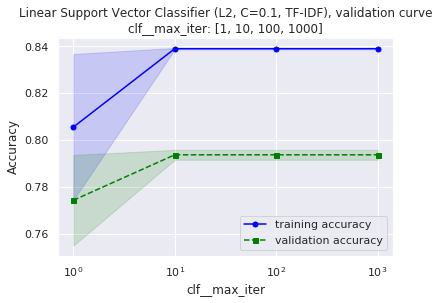

In [27]:
vect_name = 'TF-IDF'
c = 0.1
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lsvc_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', LinearSVC(random_state=random_state,
                                         penalty='l2',
                                         C=c))])
param_name = 'clf__max_iter'
param_range = [1, 10, 100, 1000]
model_name = "Linear Support Vector Classifier (L2, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lsvc_tfidf, model_name, X_train, y_train, param_name, param_range, xlog=True, n_jobs=8)

#### Vectorization parameters

Validation curve for Linear Support Vector Classifier (L2, C=0.1, TF-IDF) plotted, took 38.50 seconds (0.64 minutes)


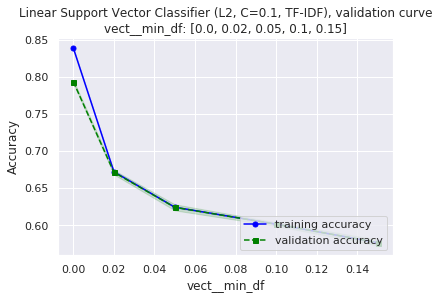

In [28]:
vect_name = 'TF-IDF'
c = 0.1
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lsvc_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', LinearSVC(random_state=random_state,
                                         penalty='l2',
                                         C=c))])
param_name = 'vect__min_df'
param_range = [0.0, 0.02, 0.05, 0.1, 0.15]
model_name = "Linear Support Vector Classifier (L2, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lsvc_tfidf, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

In [122]:
vect_name = 'TF-IDF'
c = 0.1
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lsvc_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', LinearSVC(random_state=random_state,
                                         penalty='l2',
                                         C=c))])
param_name = 'vect__max_features'
param_range = [100, 1000, 2000, 5000, 10000, 20000]
model_name = "Linear Support Vector Classifier (L2, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lsvc_tfidf, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

KeyboardInterrupt: 

### Linear Support Vector Classification (L1 regularization)

#### Classifier parameters

Validation curve for Linear Support Vector Classifier (L1, TF-IDF) plotted, took 166.53 seconds (2.78 minutes)


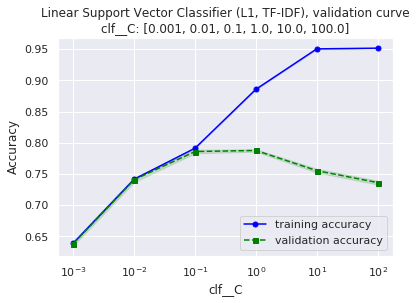

In [33]:
vect_name = 'TF-IDF'
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lsvc_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', LinearSVC(random_state=random_state,
                                         penalty='l1',
                                         dual=False))])
param_name = 'clf__C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
model_name = "Linear Support Vector Classifier (L1, {0})".format(vect_name)
plot_validation_curve(lsvc_tfidf, model_name, X_train, y_train, param_name, param_range, xlog=True, n_jobs=8)

Validation curve for Linear Support Vector Classifier (L1, C=0.1, TF-IDF) plotted, took 38.74 seconds (0.65 minutes)


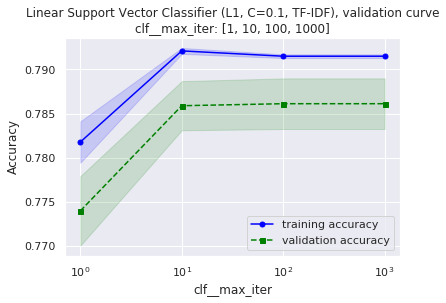

In [34]:
vect_name = 'TF-IDF'
c = 0.1
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lsvc_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', LinearSVC(random_state=random_state,
                                         penalty='l1',
                                         C=c,
                                         dual=False))])
param_name = 'clf__max_iter'
param_range = [1, 10, 100, 1000]
model_name = "Linear Support Vector Classifier (L1, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lsvc_tfidf, model_name, X_train, y_train, param_name, param_range, xlog=True, n_jobs=8)

#### Vectorization parameters

Validation curve for Linear Support Vector Classifier (L1, C=0.1, TF-IDF) plotted, took 39.19 seconds (0.65 minutes)


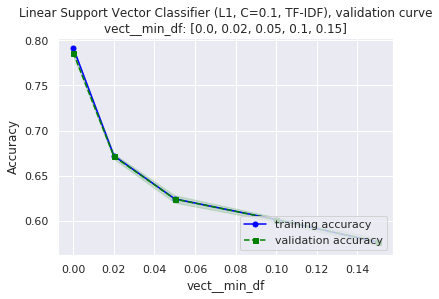

In [35]:
vect_name = 'TF-IDF'
c = 0.1
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lsvc_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', LinearSVC(random_state=random_state,
                                         penalty='l1',
                                         C=c,
                                         dual=False))])
param_name = 'vect__min_df'
param_range = [0.0, 0.02, 0.05, 0.1, 0.15]
model_name = "Linear Support Vector Classifier (L1, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lsvc_tfidf, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

Validation curve for Linear Support Vector Classifier (L1, C=0.1, TF-IDF) plotted, took 43.86 seconds (0.73 minutes)


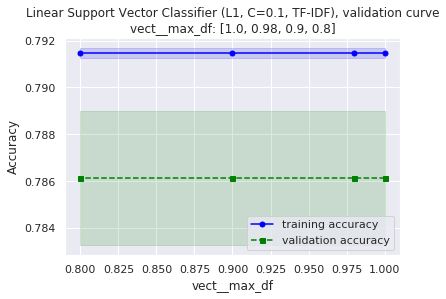

In [36]:
vect_name = 'TF-IDF'
c = 0.1
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lsvc_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', LinearSVC(random_state=random_state,
                                         penalty='l1',
                                         C=0.1,
                                         dual=False))])
param_name = 'vect__max_df'
param_range = [1.0, 0.98, 0.9, 0.8]
model_name = "Linear Support Vector Classifier (L1, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lsvc_tfidf, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

In [37]:
vect_name = 'TF-IDF'
c = 0.1
model_name = "Linear Support Vector Classifier (L1, C={0}, {1})".format(c, vect_name)
t = time()

tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, tokenizer=tokenizer)
lsvc_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', LinearSVC(random_state=random_state,
                                         penalty='l1',
                                         C=c,
                                         dual=False))])
param_grid = [{'vect__ngram_range': [(1,1), (1,2), (1,3)]}]
gs_lsvc_tfidf = GridSearchCV(lsvc_tfidf, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=8)
gs_lsvc_tfidf.fit(X_train, y_train)
elapsed = time() - t
print("Grid search completed! Took {0:,.2f} seconds ({1:,.2f} minutes)".format(elapsed, elapsed / 60))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:   43.1s finished


Grid search completed! Took 59.93 seconds (1.00 minutes)


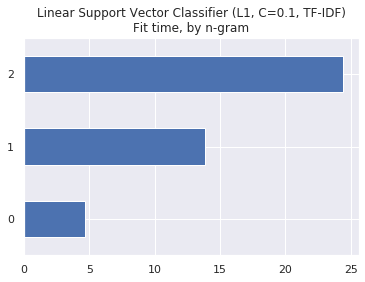

In [38]:
ngram_gs = pd.DataFrame(gs_lsvc_tfidf.cv_results_)
ngram_gs['mean_fit_time'].plot(kind='barh', title='{0}\nFit time, by n-gram'.format(model_name));

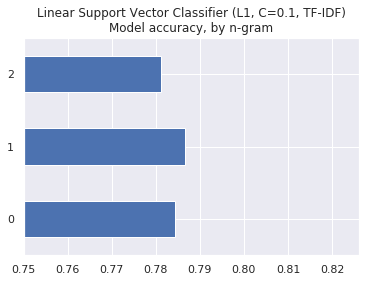

In [39]:
ax = ngram_gs['mean_test_score'].plot(kind='barh', title='{0}\nModel accuracy, by n-gram'.format(model_name))
ax.set_xlim(0.75);

### Multinomial Naive Bayes

#### Vectorization parameters

Validation curve for Multinomial Naive Bayes (TF-IDF) plotted, took 34.71 seconds (0.58 minutes)


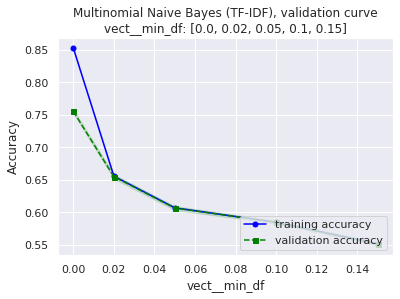

In [107]:
vect_name = 'TF-IDF'
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
multinb_tfidf = Pipeline([('vect', tfidf), 
                          ('clf', MultinomialNB())])
param_name = 'vect__min_df'
param_range = [0.0, 0.02, 0.05, 0.1, 0.15]
model_name = "Multinomial Naive Bayes ({0})".format(vect_name)
plot_validation_curve(multinb_tfidf, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

Validation curve for Multinomial Naive Bayes (TF-IDF) plotted, took 30.06 seconds (0.50 minutes)


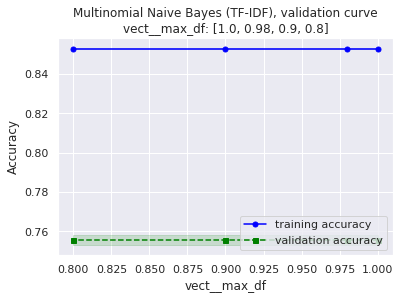

In [108]:
vect_name = 'TF-IDF'
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
multinb_tfidf = Pipeline([('vect', tfidf), 
                          ('clf', MultinomialNB())])
param_name = 'vect__max_df'
param_range = [1.0, 0.98, 0.9, 0.8]
model_name = "Multinomial Naive Bayes ({0})".format(vect_name)
plot_validation_curve(multinb_tfidf, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

In [109]:
vect_name = 'TF-IDF'
model_name = "Multinomial Naive Bayes ({0})".format(vect_name)
t = time()

tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, tokenizer=tokenizer)

multinb_tfidf = Pipeline([('vect', tfidf), 
                          ('clf', MultinomialNB())])

param_grid = [{'vect__ngram_range': [(1,1), (1,2), (1,3)]}]

gs_multinb_tfidf = GridSearchCV(multinb_tfidf, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=8)
gs_multinb_tfidf.fit(X_train, y_train)
elapsed = time() - t
print("Grid search completed! Took {0:,.2f} seconds ({1:,.2f} minutes)".format(elapsed, elapsed / 60))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
/home/stepan/anaconda3/envs/twitter/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:   30.8s finished


Grid search completed! Took 53.71 seconds (0.90 minutes)


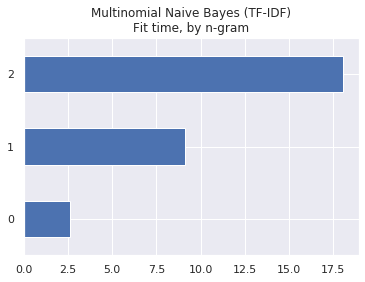

In [110]:
ngram_gs = pd.DataFrame(gs_multinb_tfidf.cv_results_)
ngram_gs['mean_fit_time'].plot(kind='barh', title='{0}\nFit time, by n-gram'.format(model_name));

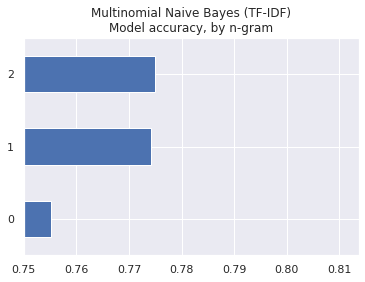

In [111]:
ax = ngram_gs['mean_test_score'].plot(kind='barh', title='{0}\nModel accuracy, by n-gram'.format(model_name))
ax.set_xlim(0.75);

### Complement Naive Bayes

#### Vectorization parameters

Validation curve for Complement Naive Bayes (TF-IDF) plotted, took 35.28 seconds (0.59 minutes)


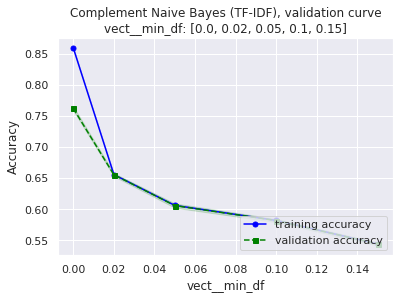

In [102]:
vect_name = 'TF-IDF'
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
complnb_tfidf = Pipeline([('vect', tfidf), 
                          ('clf', ComplementNB())])
param_name = 'vect__min_df'
param_range = [0.0, 0.02, 0.05, 0.1, 0.15]
model_name = "Complement Naive Bayes ({0})".format(vect_name)
plot_validation_curve(complnb_tfidf, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

Validation curve for Complement Naive Bayes (TF-IDF) plotted, took 30.66 seconds (0.51 minutes)


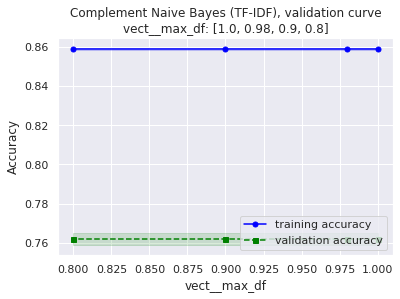

In [103]:
vect_name = 'TF-IDF'
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
complnb_tfidf = Pipeline([('vect', tfidf), 
                          ('clf', ComplementNB())])
param_name = 'vect__max_df'
param_range = [1.0, 0.98, 0.9, 0.8]
model_name = "Complement Naive Bayes ({0})".format(vect_name)
plot_validation_curve(complnb_tfidf, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

Validation curve for Linear Support Vector Classifier (L1, TF-IDF) plotted, took 166.53 seconds (2.78 minutes)


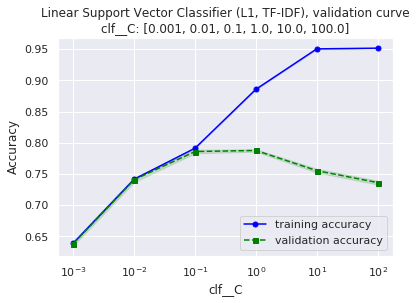

In [33]:
vect_name = 'TF-IDF'
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lsvc_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', LinearSVC(random_state=random_state,
                                         penalty='l1',
                                         dual=False))])
param_name = 'clf__C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
model_name = "Linear Support Vector Classifier (L1, {0})".format(vect_name)
plot_validation_curve(lsvc_tfidf, model_name, X_train, y_train, param_name, param_range, xlog=True, n_jobs=8)

Validation curve for Linear Support Vector Classifier (L1, C=0.1, TF-IDF) plotted, took 38.74 seconds (0.65 minutes)


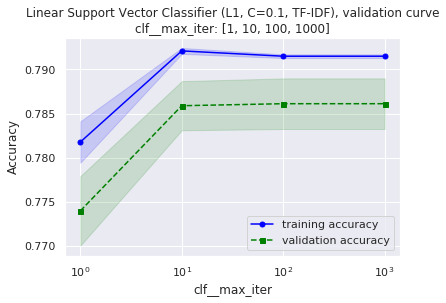

In [34]:
vect_name = 'TF-IDF'
c = 0.1
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lsvc_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', LinearSVC(random_state=random_state,
                                         penalty='l1',
                                         C=c,
                                         dual=False))])
param_name = 'clf__max_iter'
param_range = [1, 10, 100, 1000]
model_name = "Linear Support Vector Classifier (L1, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lsvc_tfidf, model_name, X_train, y_train, param_name, param_range, xlog=True, n_jobs=8)

In [104]:
vect_name = 'TF-IDF'
model_name = "Complement Naive Bayes ({0})".format(c, vect_name)
t = time()

tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, tokenizer=tokenizer)

complnb_tfidf = Pipeline([('vect', tfidf), 
                          ('clf', ComplementNB())])

param_grid = [{'vect__ngram_range': [(1,1), (1,2), (1,3)]}]

gs_complnb_tfidf = GridSearchCV(complnb_tfidf, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=8)
gs_complnb_tfidf.fit(X_train, y_train)
elapsed = time() - t
print("Grid search completed! Took {0:,.2f} seconds ({1:,.2f} minutes)".format(elapsed, elapsed / 60))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:   33.1s finished


Grid search completed! Took 55.09 seconds (0.92 minutes)


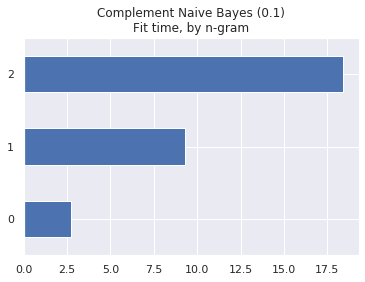

In [105]:
ngram_gs = pd.DataFrame(gs_complnb_tfidf.cv_results_)
ngram_gs['mean_fit_time'].plot(kind='barh', title='{0}\nFit time, by n-gram'.format(model_name));

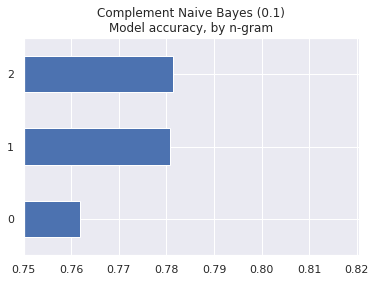

In [106]:
ax = ngram_gs['mean_test_score'].plot(kind='barh', title='{0}\nModel accuracy, by n-gram'.format(model_name))
ax.set_xlim(0.75);

## Bag of words (BoW) 

### Logistic regression (L2 regularization)

#### Classifier parameters

/home/stepan/anaconda3/envs/twitter/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Validation curve for Logistic Regression (L2, BOW) plotted, took 96.97 seconds (1.62 minutes)


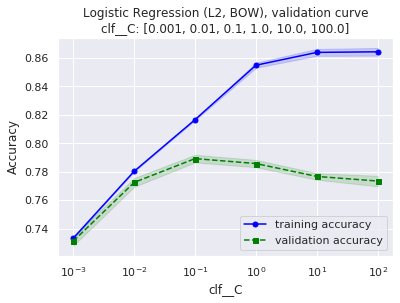

In [40]:
vect_name = 'BOW'
bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)
lr_bow = Pipeline([('vect', bow), 
                   ('clf', LogisticRegression(random_state=random_state, 
                                              solver='lbfgs',
                                              penalty='l2'))])
param_name = 'clf__C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
model_name = "Logistic Regression (L2, {0})".format(vect_name)
plot_validation_curve(lr_bow, model_name, X_train, y_train, param_name, param_range, xlog=True, n_jobs=8)

Validation curve for Logistic Regression (L2, C=0.1, BOW) plotted, took 65.88 seconds (1.10 minutes)


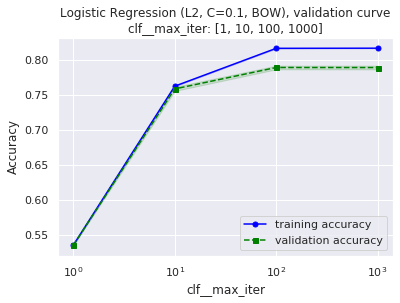

In [41]:
vect_name = 'BOW'
c = 0.1
bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)
lr_bow = Pipeline([('vect', bow), 
                   ('clf', LogisticRegression(random_state=random_state, 
                                              solver='lbfgs',
                                              penalty='l2',
                                              C=c))])
param_name = 'clf__max_iter'
param_range = [1, 10, 100, 1000]
model_name = "Logistic Regression (L2, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lr_bow, model_name, X_train, y_train, param_name, param_range, xlog=True, n_jobs=8)

#### Vectorization parameters

Validation curve for Logistic Regression (L2, C=0.1, BOW) plotted, took 48.15 seconds (0.80 minutes)


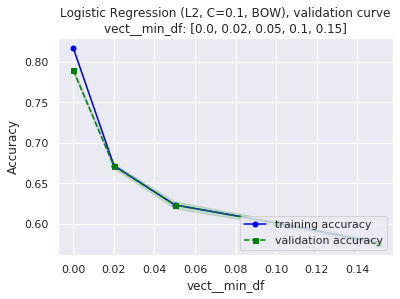

In [42]:
vect_name = 'BOW'
c = 0.1
bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)
lr_bow = Pipeline([('vect', bow), 
                   ('clf', LogisticRegression(random_state=random_state, 
                                              solver='lbfgs',
                                              penalty='l2',
                                              C=c))])
param_name = 'vect__min_df'
param_range = [0.0, 0.02, 0.05, 0.1, 0.15]
model_name = "Logistic Regression (L2, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lr_bow, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

Validation curve for Logistic Regression (L2, C=0.1, BOW) plotted, took 72.77 seconds (1.21 minutes)


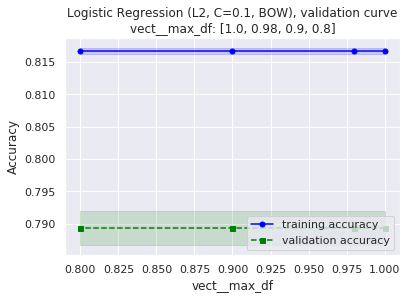

In [43]:
vect_name = 'BOW'
c = 0.1
bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)
lr_bow = Pipeline([('vect', bow), 
                   ('clf', LogisticRegression(random_state=random_state, 
                                              solver='lbfgs',
                                              penalty='l2',
                                              C=c))])
param_name = 'vect__max_df'
param_range = [1.0, 0.98, 0.9, 0.8]
model_name = "Logistic Regression (L2, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lr_bow, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

In [44]:
vect_name = 'BOW'
c = 0.1
model_name = "Logistic Regression (L2, C={0}, {1})".format(c, vect_name)
t = time()

bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)
lr_bow = Pipeline([('vect', bow), 
                   ('clf', LogisticRegression(random_state=random_state, 
                                              solver='lbfgs',
                                              penalty='l2',
                                              C=c))])
param_grid = [{'vect__ngram_range': [(1,1), (1,2), (1,3)]}]
gs_lr_bow = GridSearchCV(lr_bow, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=8)
gs_lr_bow.fit(X_train, y_train)
elapsed = time() - t
print("Grid search completed! Took {0:,.2f} seconds ({1:,.2f} minutes)".format(elapsed, elapsed / 60))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:  2.4min finished


Grid search completed! Took 225.22 seconds (3.75 minutes)


/home/stepan/anaconda3/envs/twitter/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


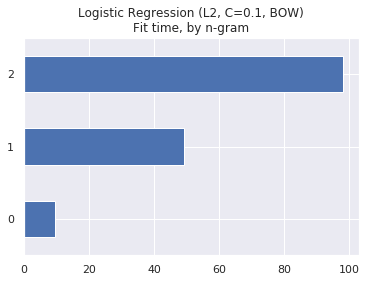

In [45]:
ngram_gs = pd.DataFrame(gs_lr_bow.cv_results_)
ngram_gs['mean_fit_time'].plot(kind='barh', title='{0}\nFit time, by n-gram'.format(model_name));

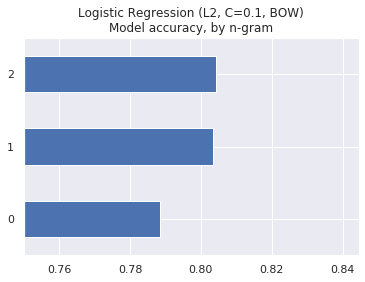

In [46]:
ax = ngram_gs['mean_test_score'].plot(kind='barh', title='{0}\nModel accuracy, by n-gram'.format(model_name))
ax.set_xlim(0.75);

### Logistic regression (L1 regularization)

#### Classifier parameters

Validation curve for Logistic Regression (L1, BOW) plotted, took 67.49 seconds (1.12 minutes)


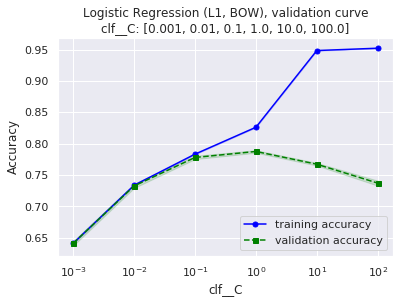

In [47]:
vect_name = 'BOW'
bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)
lr_bow = Pipeline([('vect', bow), 
                   ('clf', LogisticRegression(random_state=random_state, 
                                              solver='liblinear',
                                              penalty='l1'))])
param_name = 'clf__C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
model_name = "Logistic Regression (L1, {0})".format(vect_name)
plot_validation_curve(lr_bow, model_name, X_train, y_train, param_name, param_range, xlog=True, n_jobs=8)

Validation curve for Logistic Regression (L1, C=0.1, BOW) plotted, took 36.58 seconds (0.61 minutes)


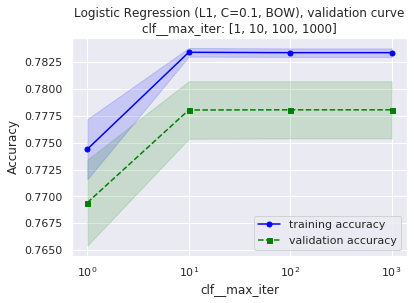

In [48]:
vect_name = 'BOW'
c = 0.1
bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)
lr_bow = Pipeline([('vect', bow), 
                   ('clf', LogisticRegression(random_state=random_state, 
                                              solver='liblinear',
                                              penalty='l1',
                                              C=c))])
param_name = 'clf__max_iter'
param_range = [1, 10, 100, 1000]
model_name = "Logistic Regression (L1, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lr_bow, model_name, X_train, y_train, param_name, param_range, xlog=True, n_jobs=8)

#### Vectorization parameters

Validation curve for Logistic Regression (L1, C=0.1, BOW) plotted, took 38.45 seconds (0.64 minutes)


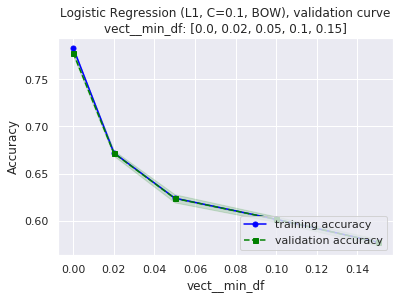

In [49]:
vect_name = 'BOW'
c = 0.1
bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)
lr_bow = Pipeline([('vect', bow), 
                   ('clf', LogisticRegression(random_state=random_state, 
                                              solver='liblinear',
                                              penalty='l1',
                                              C=c))])
param_name = 'vect__min_df'
param_range = [0.0, 0.02, 0.05, 0.1, 0.15]
model_name = "Logistic Regression (L1, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lr_bow, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

Validation curve for Logistic Regression (L1, C=0.1, BOW) plotted, took 39.27 seconds (0.65 minutes)


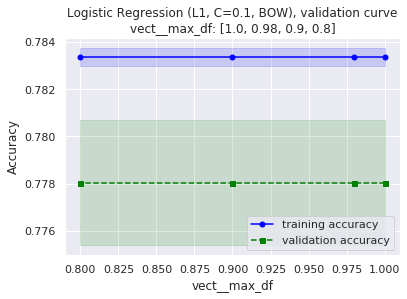

In [50]:
vect_name = 'BOW'
c = 0.1
bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)
lr_bow = Pipeline([('vect', bow), 
                   ('clf', LogisticRegression(random_state=random_state, 
                                              solver='liblinear',
                                              penalty='l1',
                                              C=c))])
param_name = 'vect__max_df'
param_range = [1.0, 0.98, 0.9, 0.8]
model_name = "Logistic Regression (L1, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lr_bow, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

In [51]:
vect_name = 'BOW'
model_name = "Logistic Regression (L1, C={0}, {1})".format(c, vect_name)
t = time()

bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)
lr_bow = Pipeline([('vect', bow), 
                   ('clf', LogisticRegression(random_state=random_state, 
                                              solver='liblinear',
                                              penalty='l1',
                                              C=c))])
param_grid = [{'vect__ngram_range': [(1,1), (1,2), (1,3)]}]
gs_lr_bow = GridSearchCV(lr_bow, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=8)
gs_lr_bow.fit(X_train, y_train)
elapsed = time() - t
print("Grid search completed! Took {0:,.2f} seconds ({1:,.2f} minutes)".format(elapsed, elapsed / 60))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:   43.0s finished


Grid search completed! Took 74.82 seconds (1.25 minutes)


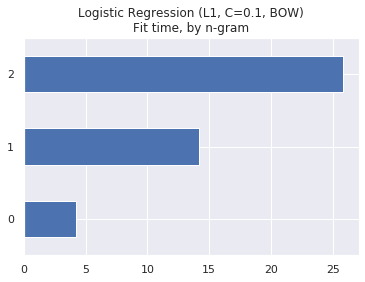

In [52]:
ngram_gs = pd.DataFrame(gs_lr_bow.cv_results_)
ngram_gs['mean_fit_time'].plot(kind='barh', title='{0}\nFit time, by n-gram'.format(model_name));

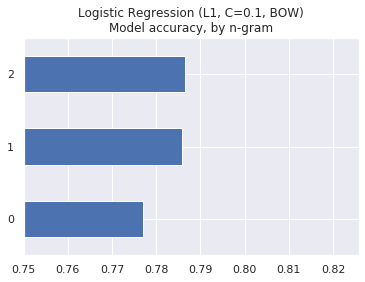

In [53]:
ax = ngram_gs['mean_test_score'].plot(kind='barh', title='{0}\nModel accuracy, by n-gram'.format(model_name))
ax.set_xlim(0.75);

### Linear Support Vector Classification (L2 regularization)

#### Classifier parameters

Validation curve for Linear Support Vector Classifier (L2, BOW) plotted, took 298.64 seconds (4.98 minutes)


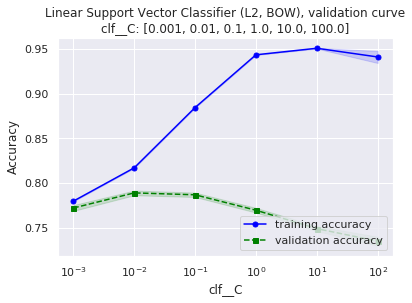

In [54]:
vect_name = 'BOW'
bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)
lsvc_bow = Pipeline([('vect', bow), 
                     ('clf', LinearSVC(random_state=random_state,
                                       penalty='l2'))])
param_name = 'clf__C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
model_name = "Linear Support Vector Classifier (L2, {0})".format(vect_name)
plot_validation_curve(lsvc_bow, model_name, X_train, y_train, param_name, param_range, xlog=True, n_jobs=8)

Validation curve for Linear Support Vector Classifier (L2, C=0.01, BOW) plotted, took 38.01 seconds (0.63 minutes)


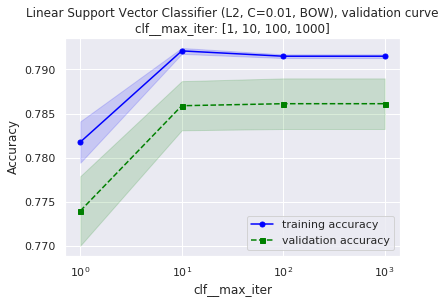

In [55]:
vect_name = 'BOW'
c = 0.01
bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)
lsvc_bow = Pipeline([('vect', bow), 
                     ('clf', LinearSVC(random_state=random_state,
                                       penalty='l2',
                                       C=c))])
param_name = 'clf__max_iter'
param_range = [1, 10, 100, 1000]
model_name = "Linear Support Vector Classifier (L2, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lsvc_tfidf, model_name, X_train, y_train, param_name, param_range, xlog=True, n_jobs=8)

#### Vectorization parameters

Validation curve for Linear Support Vector Classifier (L2, C=0.01, BOW) plotted, took 36.93 seconds (0.62 minutes)


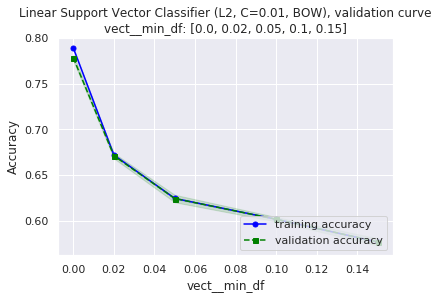

In [58]:
vect_name = 'BOW'
c = 0.01
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lsvc_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', LinearSVC(random_state=random_state,
                                         penalty='l2',
                                         C=c))])
param_name = 'vect__min_df'
param_range = [0.0, 0.02, 0.05, 0.1, 0.15]
model_name = "Linear Support Vector Classifier (L2, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lsvc_tfidf, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

Validation curve for Linear Support Vector Classifier (L2, C=0.01, BOW) plotted, took 33.85 seconds (0.56 minutes)


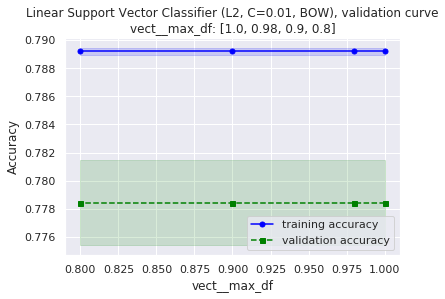

In [59]:
vect_name = 'BOW'
c = 0.01
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lsvc_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', LinearSVC(random_state=random_state,
                                         penalty='l2',
                                         C=c))])
param_name = 'vect__max_df'
param_range = [1.0, 0.98, 0.9, 0.8]
model_name = "Linear Support Vector Classifier (L2, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lsvc_tfidf, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

In [62]:
vect_name = 'BOW'
c = 0.01
model_name = "Linear Support Vector Classifier (L2, C={0}, {1})".format(c, vect_name)
t = time()

tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, tokenizer=tokenizer)
lsvc_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', LinearSVC(random_state=random_state,
                                         penalty='l2',
                                         C=c))])
param_grid = [{'vect__ngram_range': [(1,1), (1,2), (1,3)]}]
gs_lsvc_tfidf = GridSearchCV(lsvc_tfidf, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=8)
gs_lsvc_tfidf.fit(X_train, y_train)
elapsed = time() - t
print("Grid search completed! Took {0:,.2f} seconds ({1:,.2f} minutes)".format(elapsed, elapsed / 60))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
/home/stepan/anaconda3/envs/twitter/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:   35.7s finished


Grid search completed! Took 40.33 seconds (0.67 minutes)


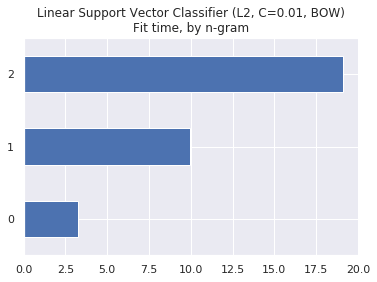

In [63]:
ngram_gs = pd.DataFrame(gs_lsvc_tfidf.cv_results_)
ngram_gs['mean_fit_time'].plot(kind='barh', title='{0}\nFit time, by n-gram'.format(model_name));

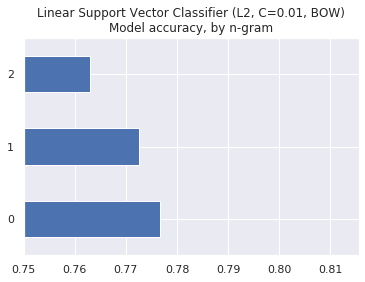

In [64]:
ax = ngram_gs['mean_test_score'].plot(kind='barh', title='{0}\nModel accuracy, by n-gram'.format(model_name))
ax.set_xlim(0.75);

### Linear Support Vector Classification (L1 regularization)

#### Classifier parameters

Validation curve for Linear Support Vector Classifier (L1, BOW) plotted, took 165.56 seconds (2.76 minutes)


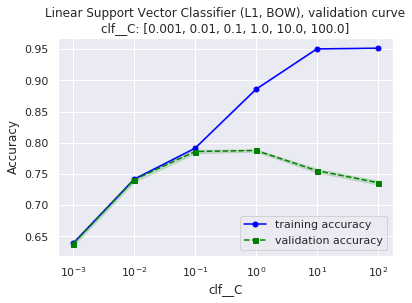

In [65]:
vect_name = 'BOW'
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lsvc_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', LinearSVC(random_state=random_state,
                                         penalty='l1',
                                         dual=False))])
param_name = 'clf__C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
model_name = "Linear Support Vector Classifier (L1, {0})".format(vect_name)
plot_validation_curve(lsvc_tfidf, model_name, X_train, y_train, param_name, param_range, xlog=True, n_jobs=8)

Validation curve for Linear Support Vector Classifier (L1, C=0.1, BOW) plotted, took 39.79 seconds (0.66 minutes)


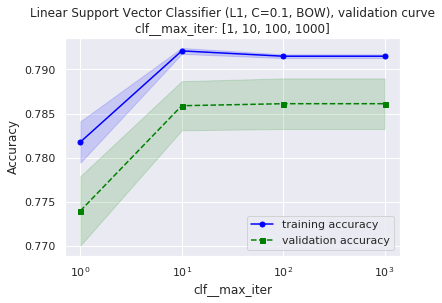

In [74]:
vect_name = 'BOW'
c = 0.1
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lsvc_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', LinearSVC(random_state=random_state,
                                         penalty='l1',
                                         C=c,
                                         dual=False))])
param_name = 'clf__max_iter'
param_range = [1, 10, 100, 1000]
model_name = "Linear Support Vector Classifier (L1, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lsvc_tfidf, model_name, X_train, y_train, param_name, param_range, xlog=True, n_jobs=8)

#### Vectorization parameters

Validation curve for Linear Support Vector Classifier (L1, C=0.1, BOW) plotted, took 39.05 seconds (0.65 minutes)


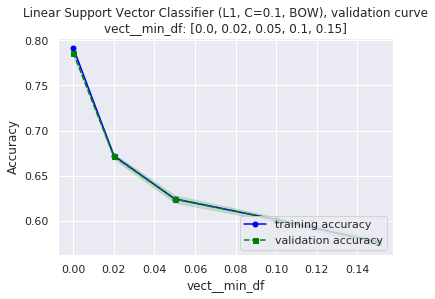

In [75]:
vect_name = 'BOW'
c = 0.1
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lsvc_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', LinearSVC(random_state=random_state,
                                         penalty='l1',
                                         C=c,
                                         dual=False))])
param_name = 'vect__min_df'
param_range = [0.0, 0.02, 0.05, 0.1, 0.15]
model_name = "Linear Support Vector Classifier (L1, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lsvc_tfidf, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

Validation curve for Linear Support Vector Classifier (L1, C=0.1, BOW) plotted, took 44.36 seconds (0.74 minutes)


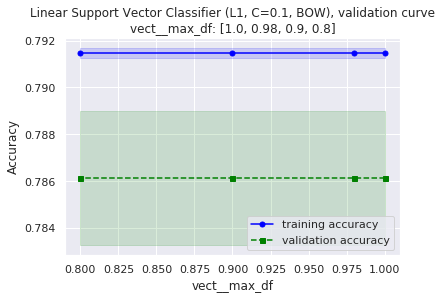

In [76]:
vect_name = 'BOW'
c = 0.1
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
lsvc_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', LinearSVC(random_state=random_state,
                                         penalty='l1',
                                         C=c,
                                         dual=False))])
param_name = 'vect__max_df'
param_range = [1.0, 0.98, 0.9, 0.8]
model_name = "Linear Support Vector Classifier (L1, C={0}, {1})".format(c, vect_name)
plot_validation_curve(lsvc_tfidf, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

In [77]:
vect_name = 'BOW'
c = 0.1
model_name = "Linear Support Vector Classifier (L1, C={0}, {1})".format(c, vect_name)
t = time()

tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, tokenizer=tokenizer)
lsvc_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', LinearSVC(random_state=random_state,
                                         penalty='l1',
                                         C=c,
                                         dual=False))])
param_grid = [{'vect__ngram_range': [(1,1), (1,2), (1,3)]}]
gs_lsvc_tfidf = GridSearchCV(lsvc_tfidf, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=8)
gs_lsvc_tfidf.fit(X_train, y_train)
elapsed = time() - t
print("Grid search completed! Took {0:,.2f} seconds ({1:,.2f} minutes)".format(elapsed, elapsed / 60))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:   43.3s finished


Grid search completed! Took 60.26 seconds (1.00 minutes)


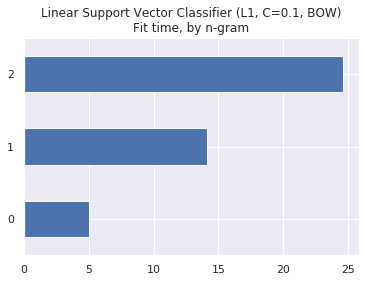

In [78]:
ngram_gs = pd.DataFrame(gs_lsvc_tfidf.cv_results_)
ngram_gs['mean_fit_time'].plot(kind='barh', title='{0}\nFit time, by n-gram'.format(model_name));

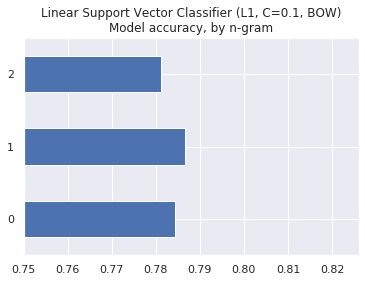

In [79]:
ax = ngram_gs['mean_test_score'].plot(kind='barh', title='{0}\nModel accuracy, by n-gram'.format(model_name))
ax.set_xlim(0.75);

### Multinomial Naive Bayes

#### Vectorization parameters

Validation curve for Multinomial Naive Bayes (BOW) plotted, took 35.26 seconds (0.59 minutes)


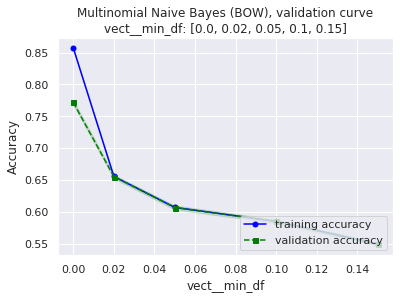

In [112]:
vect_name = 'BOW'
bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)
multinb_bow = Pipeline([('vect', bow), 
                        ('clf', MultinomialNB())])
param_name = 'vect__min_df'
param_range = [0.0, 0.02, 0.05, 0.1, 0.15]
model_name = "Multinomial Naive Bayes ({0})".format(vect_name)
plot_validation_curve(multinb_bow, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

Validation curve for Multinomial Naive Bayes (BOW) plotted, took 29.16 seconds (0.49 minutes)


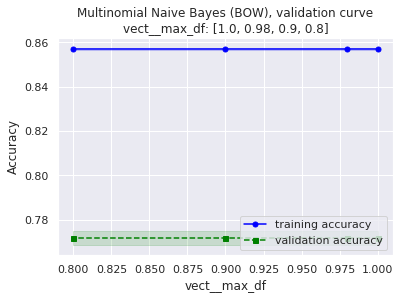

In [113]:
vect_name = 'BOW'
bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)
multinb_bow = Pipeline([('vect', bow), 
                        ('clf', MultinomialNB())])
param_name = 'vect__max_df'
param_range = [1.0, 0.98, 0.9, 0.8]
model_name = "Multinomial Naive Bayes ({0})".format(vect_name)
plot_validation_curve(multinb_bow, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

In [114]:
vect_name = 'BOW'
model_name = "Multinomial Naive Bayes ({0})".format(vect_name)
t = time()

bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)

multinb_bow = Pipeline([('vect', bow), 
                        ('clf', MultinomialNB())])

param_grid = [{'vect__ngram_range': [(1,1), (1,2), (1,3)]}]

gs_multinb_bow = GridSearchCV(multinb_bow, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=8)
gs_multinb_bow.fit(X_train, y_train)
elapsed = time() - t
print("Grid search completed! Took {0:,.2f} seconds ({1:,.2f} minutes)".format(elapsed, elapsed / 60))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:   31.0s finished


Grid search completed! Took 41.01 seconds (0.68 minutes)


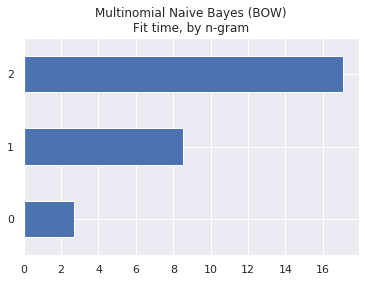

In [115]:
ngram_gs = pd.DataFrame(gs_multinb_bow.cv_results_)
ngram_gs['mean_fit_time'].plot(kind='barh', title='{0}\nFit time, by n-gram'.format(model_name));

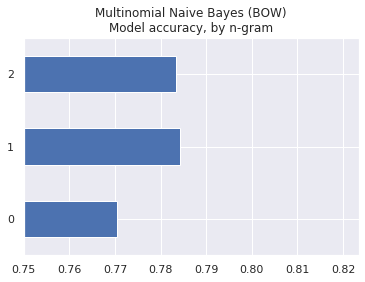

In [116]:
ax = ngram_gs['mean_test_score'].plot(kind='barh', title='{0}\nModel accuracy, by n-gram'.format(model_name))
ax.set_xlim(0.75);

### Complement Naive Bayes

#### Vectorization parameters

Validation curve for Complement Naive Bayes (BOW) plotted, took 35.38 seconds (0.59 minutes)


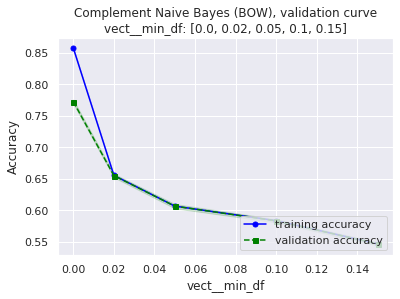

In [117]:
vect_name = 'BOW'
bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)
complnb_bow = Pipeline([('vect', bow), 
                          ('clf', ComplementNB())])
param_name = 'vect__min_df'
param_range = [0.0, 0.02, 0.05, 0.1, 0.15]
model_name = "Complement Naive Bayes ({0})".format(vect_name)
plot_validation_curve(complnb_bow, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

Validation curve for Complement Naive Bayes (BOW) plotted, took 29.65 seconds (0.49 minutes)


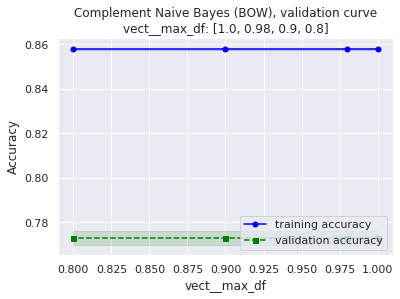

In [118]:
vect_name = 'BOW'
bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)
complnb_bow = Pipeline([('vect', bow), 
                          ('clf', ComplementNB())])
param_name = 'vect__max_df'
param_range = [1.0, 0.98, 0.9, 0.8]
model_name = "Complement Naive Bayes ({0})".format(vect_name)
plot_validation_curve(complnb_bow, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

In [119]:
vect_name = 'BOW'
model_name = "Complement Naive Bayes ({0})".format(vect_name)
t = time()

bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)

complnb_bow = Pipeline([('vect', bow), 
                          ('clf', ComplementNB())])

param_grid = [{'vect__ngram_range': [(1,1), (1,2), (1,3)]}]

gs_complnb_bow = GridSearchCV(complnb_bow, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=8)
gs_complnb_bow.fit(X_train, y_train)
elapsed = time() - t
print("Grid search completed! Took {0:,.2f} seconds ({1:,.2f} minutes)".format(elapsed, elapsed / 60))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:   29.8s finished


Grid search completed! Took 39.98 seconds (0.67 minutes)


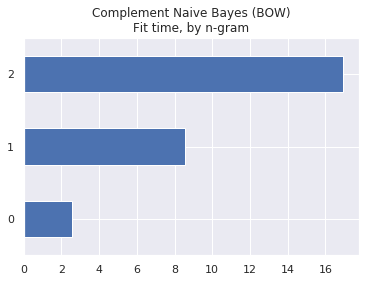

In [120]:
ngram_gs = pd.DataFrame(gs_complnb_bow.cv_results_)
ngram_gs['mean_fit_time'].plot(kind='barh', title='{0}\nFit time, by n-gram'.format(model_name));

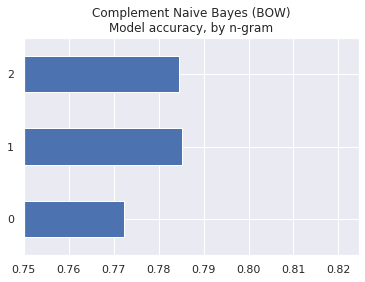

In [121]:
ax = ngram_gs['mean_test_score'].plot(kind='barh', title='{0}\nModel accuracy, by n-gram'.format(model_name))
ax.set_xlim(0.75);